In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
from pathlib import Path
fuel_econ = pd.read_csv(Path('vis_practice/fuel-econ.csv'))

In [3]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [9]:
fuel_econ.trans.value_counts()

Automatic (S8)                      814
Automatic (S6)                      739
Manual 6-spd                        658
Automatic (AM-S7)                   226
Automatic 7-spd                     212
Automatic (variable gear ratios)    178
Automatic 8-spd                     138
Manual 5-spd                        126
Automatic 6-spd                     126
Automatic (S7)                       98
Automatic (AM-S6)                    91
Manual 7-spd                         77
Automatic (AM6)                      75
Automatic (AM7)                      63
Automatic 9-spd                      62
Automatic (AV-S6)                    43
Automatic (AV-S7)                    43
Automatic 5-spd                      33
Automatic (AM-S8)                    27
Automatic 4-spd                      25
Automatic (AV-S8)                    22
Automatic (S9)                       14
Automatic (S5)                       14
Automatic (S10)                      13
Automatic (A1)                        7


In [11]:
# simplifying categories in transmission (just Manual v. Automatic)
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
fuel_econ.trans_type.value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

In [16]:
fuel_econ.VClass.value_counts().index

Index(['Midsize Cars', 'Compact Cars', 'Subcompact Cars', 'Large Cars',
       'Minicompact Cars'],
      dtype='object')

In [19]:
veh_class = pd.api.types.CategoricalDtype(categories=['Minicompact Cars','Subcompact Cars','Compact Cars',
                                          'Midsize Cars','Large Cars'], ordered=True)
fuel_econ.VClass = fuel_econ.VClass.astype(veh_class)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

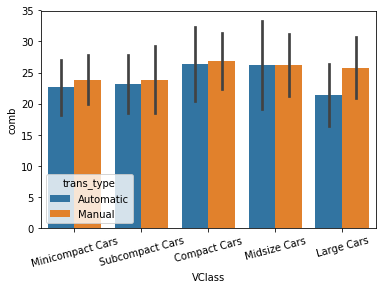

In [20]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd')
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

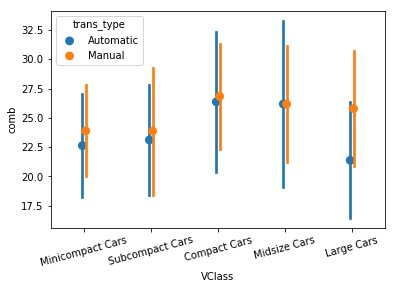

In [21]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', linestyles='', ci='sd', hue='trans_type', dodge=True)
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

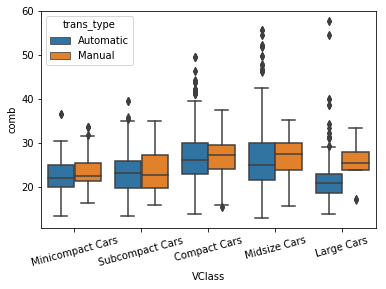

In [22]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)

In [24]:
pokemon = pd.read_csv(Path('vis_practice/pokemon.csv'))

In [25]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [34]:
pokemon_sub = pokemon.iloc[:,-5:]

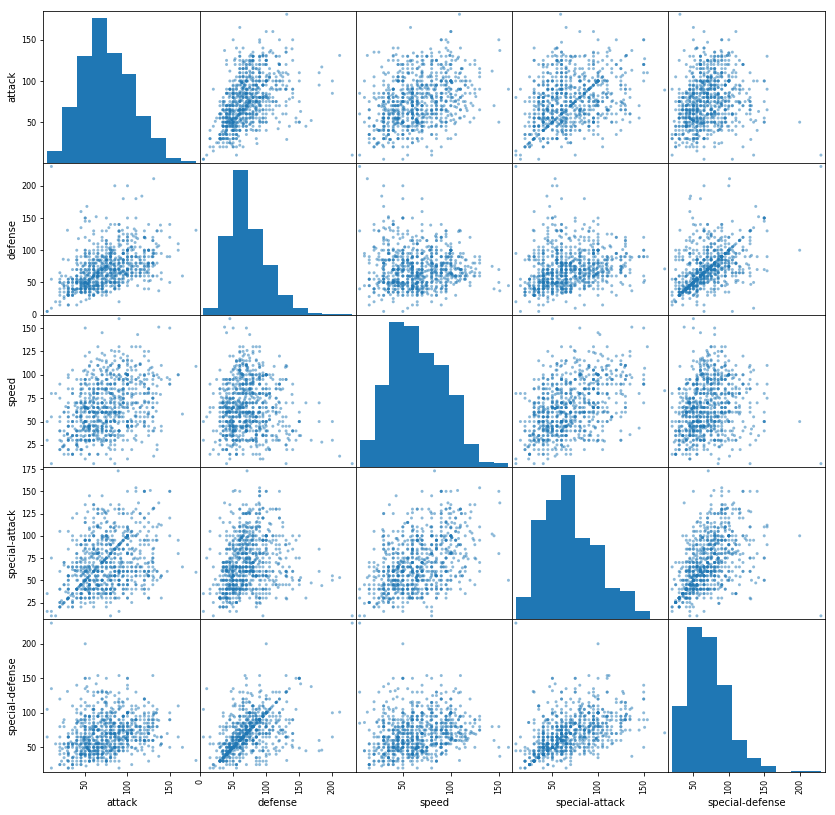

In [38]:
pd.plotting.scatter_matrix(pokemon_sub, figsize=(14,14));

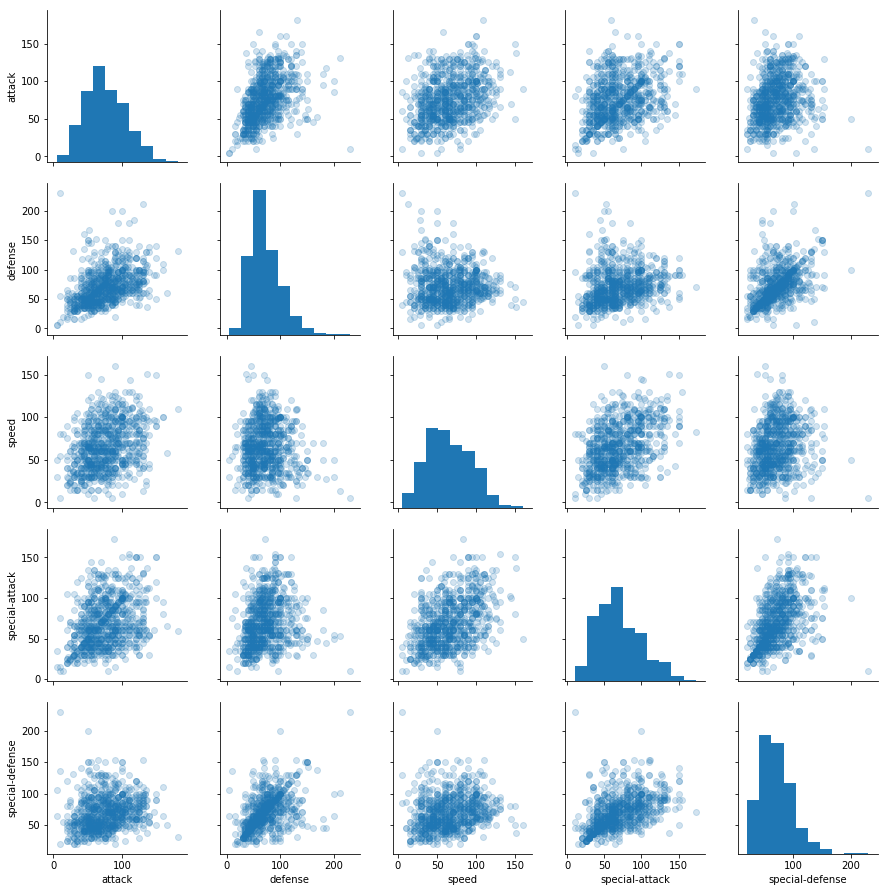

In [37]:
# comparing output of scatter_matrix and seaborn PairGrid

g = sb.PairGrid(pokemon_sub)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=0.2)

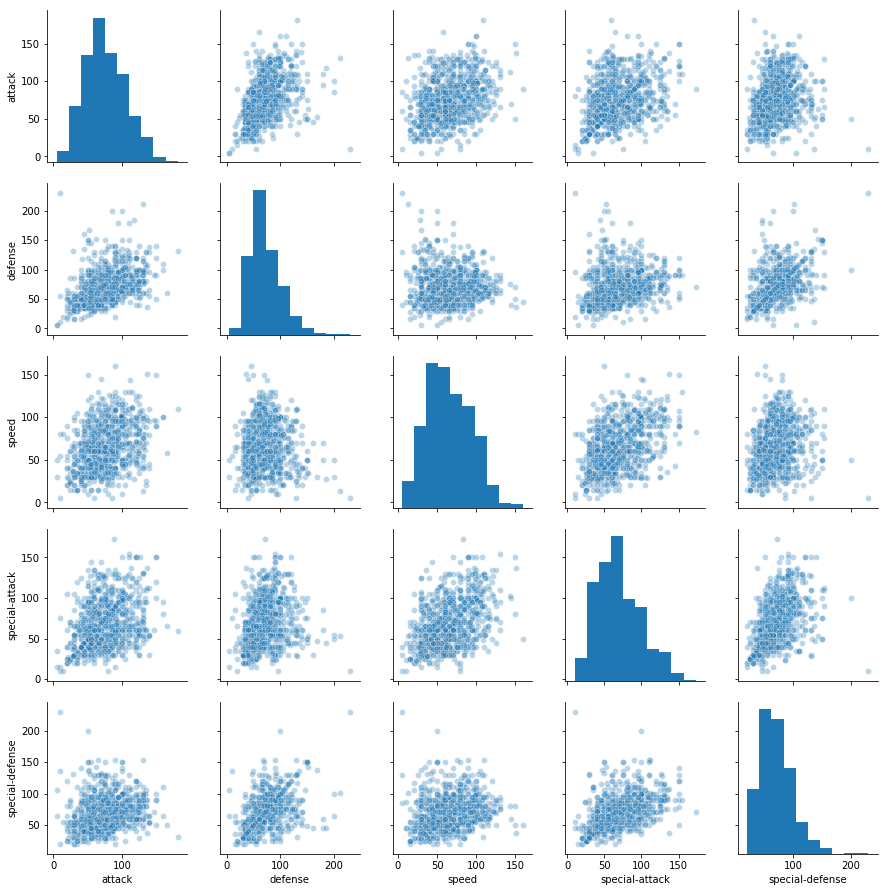

In [48]:
sb.pairplot(pokemon_sub, plot_kws={'alpha': 0.3})

In [50]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [39]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
id                 807 non-null int64
species            807 non-null object
generation_id      807 non-null int64
height             807 non-null float64
weight             807 non-null float64
base_experience    807 non-null int64
type_1             807 non-null object
type_2             405 non-null object
hp                 807 non-null int64
attack             807 non-null int64
defense            807 non-null int64
speed              807 non-null int64
special-attack     807 non-null int64
special-defense    807 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 88.3+ KB


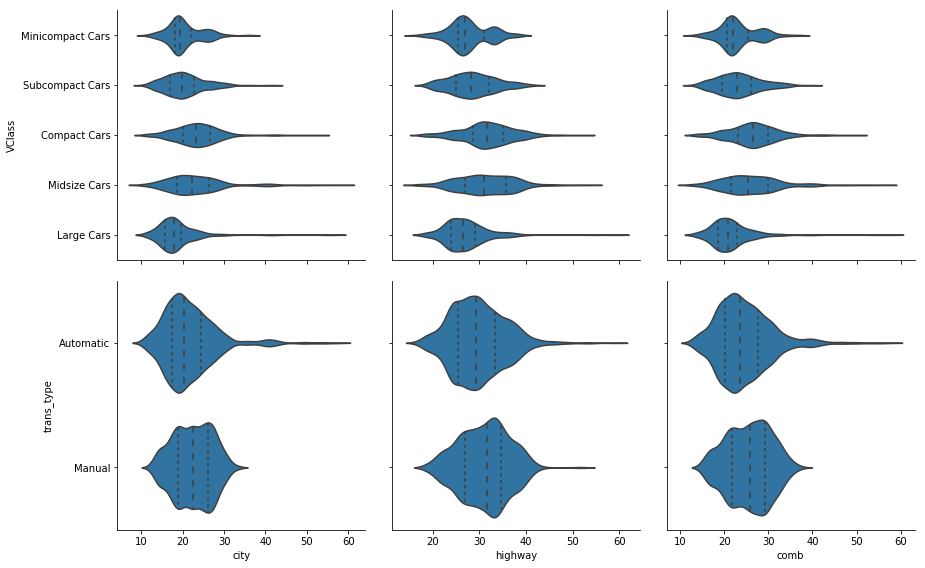

In [53]:
# relationship between numeric and categorical variables in the data

g = sb.PairGrid(fuel_econ, x_vars=['city', 'highway', 'comb'],
               y_vars=['VClass', 'trans_type'], height=4)
g.map(sb.violinplot, inner='quartile')

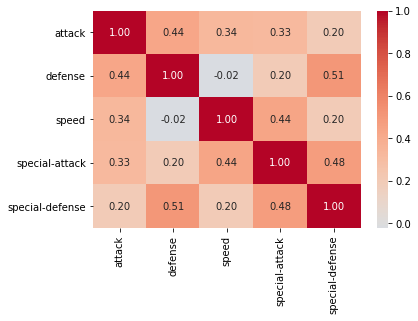

In [55]:
# Heat map for observing correlation between numeric variables
# color palette is diverging
sb.heatmap(pokemon_sub.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)